In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
animals = pd.read_csv("Animal Dataset.csv")
animals.head()

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12


In [4]:
animals.Diet.value_counts()

Diet
Carnivore                 72
Herbivore                 54
Omnivore                  40
Insectivore               17
Carnivore, Scavenger       4
Carnivore, Insectivore     4
Carnivore, Piscivore       3
Omnivore, Insectivore      2
Filter Feeder              2
Herbivore, Omnivore        1
Piscivore                  1
Insectivore, Herbivore     1
Scavenger                  1
Nectar, Insects            1
Omnivore, Herbivore        1
Herbivore, Insectivore     1
Name: count, dtype: int64

In [25]:
columns_to_keep = ['Diet', 'Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)']
df = animals[columns_to_keep]
df.head()

,Diet,Height (cm),Weight (kg),Lifespan (years),Top Speed (km/h)
0,Insectivore,105-130,40-65,20-30,40
1,Insectivore,40-50,8-14,10-12,40
2,Herbivore,270-310,2700-6000,60-70,40
3,Carnivore,80-110,120-250,10-14,80
4,Carnivore,75-80,18-36,10-12,56


In [26]:
import re

# Function to replace range values with averages
def replace_range_with_average(value):
    if '-' in value:
        # Extract the numbers from the string
        numbers = re.findall(r'\d+', value)
        # Calculate the average
        average = (int(numbers[0]) + int(numbers[1])) / 2
        return average
    elif 'Up to' in value:
        # Extract the number after "Up to"
        number = re.findall(r'\d+', value)[0]
        return int(number)
    elif '+' in value:
        # Extract the number after "Up to"
        number = re.findall(r'\d+', value)[0]
        return int(number)
    else:
        # If it's not in range format, return the original value
        return value
    
for column in df.columns:
    df[column] = df[column].apply(replace_range_with_average)

print(df)

            Diet Height (cm) Weight (kg) Lifespan (years) Top Speed (km/h)
0    Insectivore       117.5        52.5             25.0               40
1    Insectivore        45.0        11.0             11.0               40
2      Herbivore       290.0      4350.0             65.0               40
3      Carnivore        95.0       185.0             12.0               80
4      Carnivore        77.5        27.0             11.0               56
..           ...         ...         ...              ...              ...
200    Herbivore       150.0       850.0             22.5               24
201    Carnivore        62.5         2.0               20               25
202     Omnivore          15           0               20   Not Applicable
203    Herbivore       280.0       650.0             22.5               25
204    Carnivore         330          32             27.5               20

[205 rows x 5 columns]


C:\Users\buggt\AppData\Local\Temp\ipykernel_12104\2144371432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(replace_range_with_average)
C:\Users\buggt\AppData\Local\Temp\ipykernel_12104\2144371432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(replace_range_with_average)
C:\Users\buggt\AppData\Local\Temp\ipykernel_12104\2144371432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Diet              205 non-null    object
 1   Height (cm)       205 non-null    object
 2   Weight (kg)       205 non-null    object
 3   Lifespan (years)  205 non-null    object
 4   Top Speed (km/h)  205 non-null    object
dtypes: object(5)
memory usage: 8.1+ KB


In [28]:
# Drop rows with 'Not Applicable' in columns 1-4
df = df[~df[columns_to_convert].isin(['Not Applicable']).any(axis=1)]
df = df[~df[columns_to_convert].isin(['Varies']).any(axis=1)]

In [29]:
# Convert columns 1-4 to float
columns_to_convert = ['Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)']
df[columns_to_convert] = df[columns_to_convert].astype(float)


In [31]:
df.Diet.value_counts()

Diet
Carnivore                 54
Herbivore                 51
Omnivore                  34
Insectivore               11
Carnivore, Piscivore       3
Carnivore, Scavenger       3
Omnivore, Insectivore      2
Filter Feeder              2
Carnivore, Insectivore     2
Herbivore, Omnivore        1
Piscivore                  1
Insectivore, Herbivore     1
Nectar, Insects            1
Omnivore, Herbivore        1
Name: count, dtype: int64

In [32]:
# Define the valid diet types
valid_diet_types = ['Carnivore', 'Herbivore', 'Omnivore', 'Insectivore']

# Drop rows with 'Diet' values not in the valid diet types
df = df[df['Diet'].isin(valid_diet_types)]

In [33]:
df.Diet.value_counts()

Diet
Carnivore      54
Herbivore      51
Omnivore       34
Insectivore    11
Name: count, dtype: int64

C:\Users\buggt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


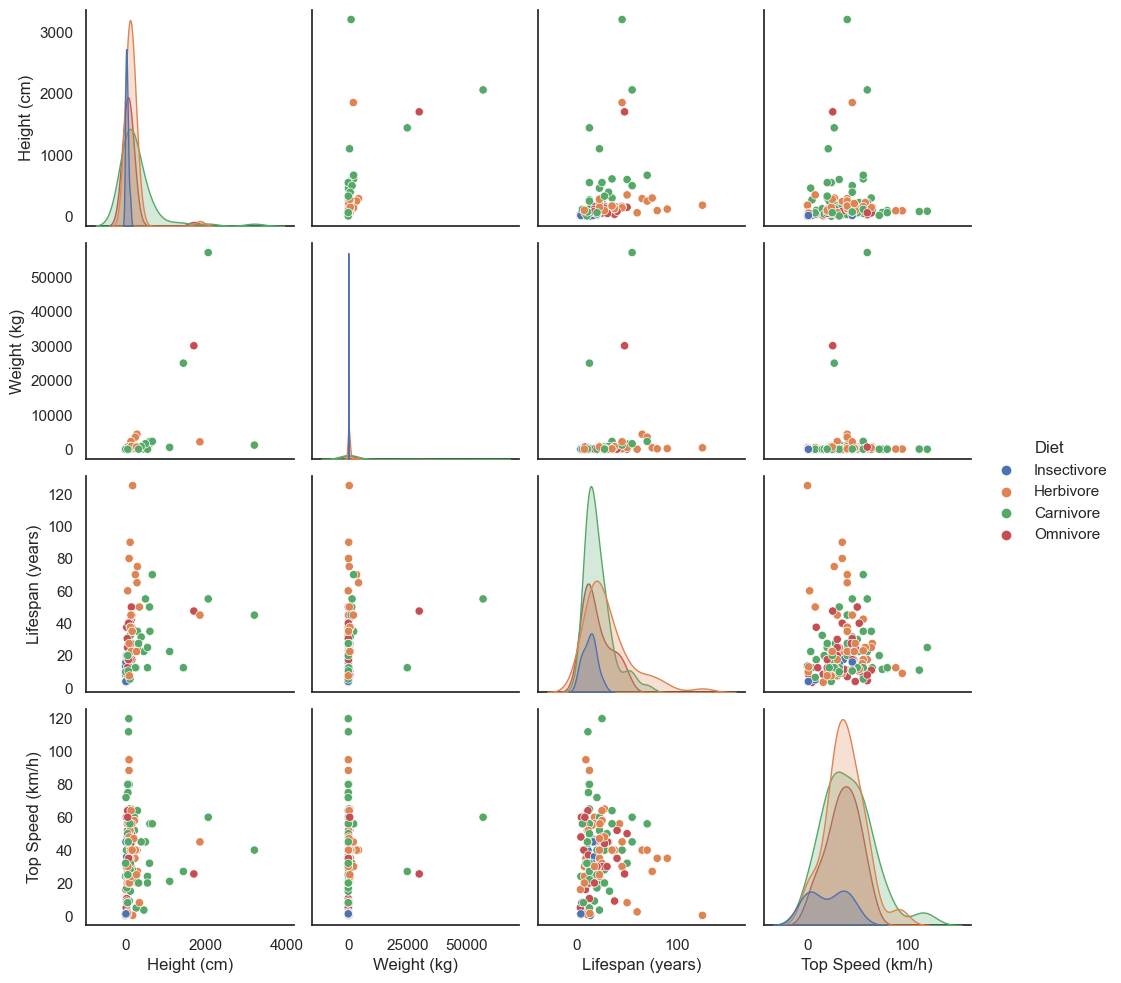

In [37]:
sns.pairplot(df, hue='Diet');

In [38]:
df

,Diet,Height (cm),Weight (kg),Lifespan (years),Top Speed (km/h)
0,Insectivore,117.5,52.5,25.0,40.0
1,Insectivore,45.0,11.0,11.0,40.0
2,Herbivore,290.0,4350.0,65.0,40.0
3,Carnivore,95.0,185.0,12.0,80.0
4,Carnivore,77.5,27.0,11.0,56.0
...,...,...,...,...,...
197,Herbivore,101.0,27.5,7.5,20.0
200,Herbivore,150.0,850.0,22.5,24.0
201,Carnivore,62.5,2.0,20.0,25.0
203,Herbivore,280.0,650.0,22.5,25.0


Height (cm)
Skew : 5.0


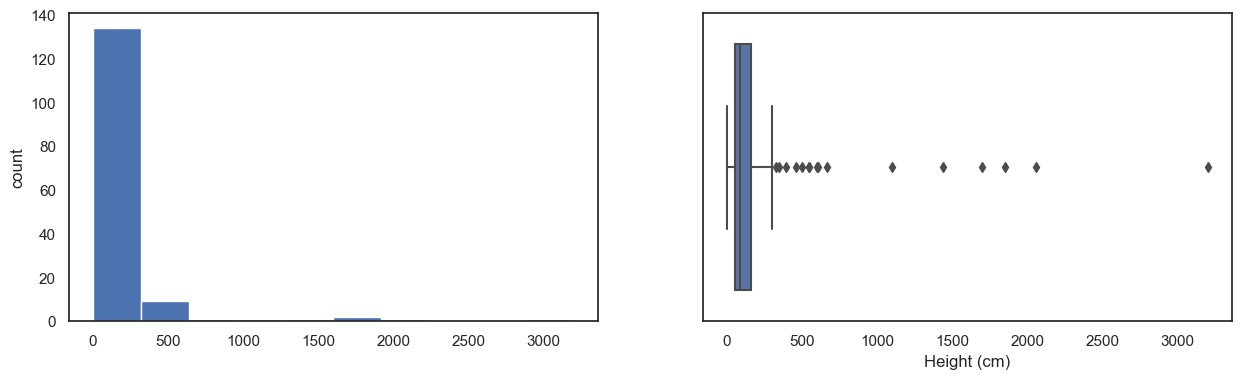

Weight (kg)
Skew : 8.24


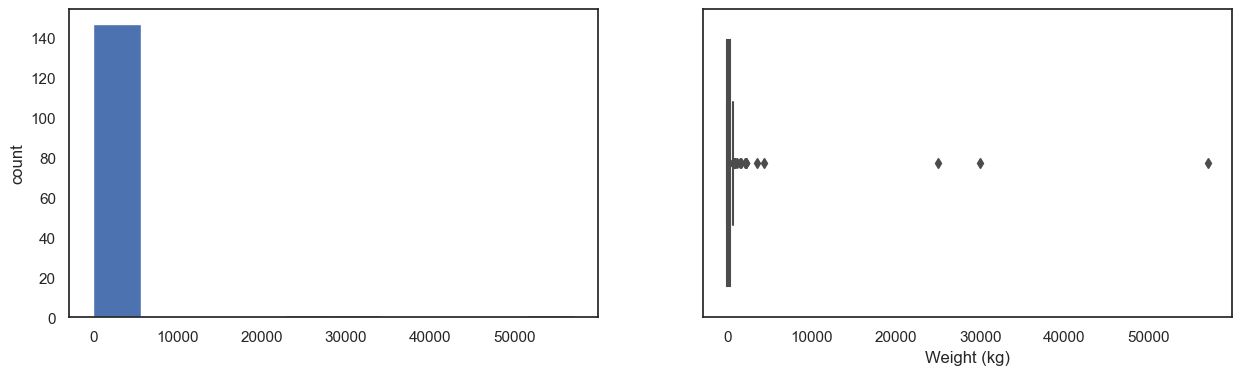

Lifespan (years)
Skew : 2.22


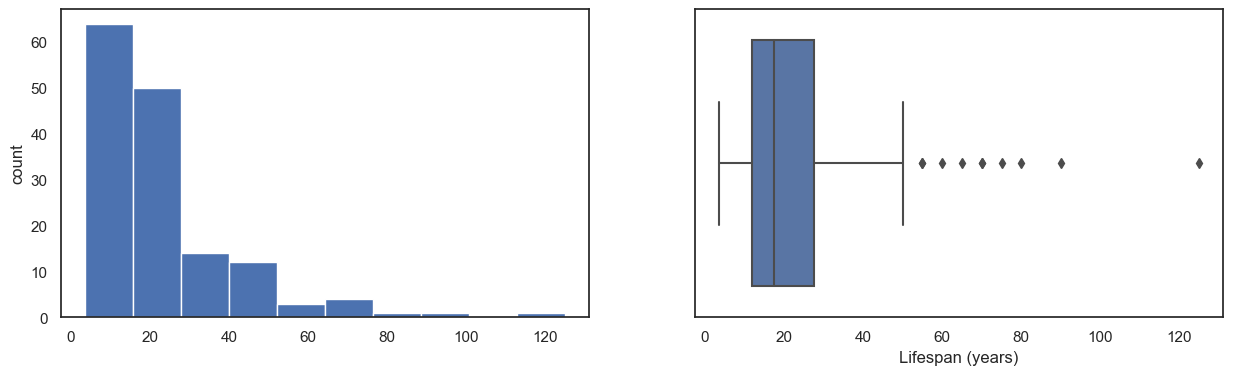

Top Speed (km/h)
Skew : 0.68


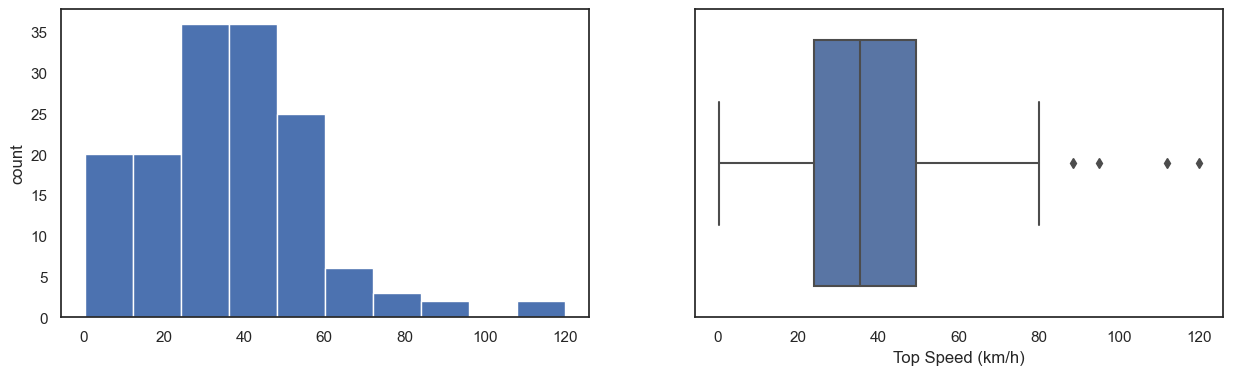

In [50]:
num_cols = ['Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)']
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
#     sns.boxplot(x=df[col], showfliers=False)
    sns.boxplot(x=df[col])
    
    plt.show()


In [40]:
df.describe()

,Height (cm),Weight (kg),Lifespan (years),Top Speed (km/h)
count,150.000000,150.000000,150.000000,150.00000
mean,197.236667,1012.340000,23.453333,37.06000
std,391.642676,5606.879149,18.373214,21.49065
min,4.500000,0.000000,3.500000,0.30000
25%,53.500000,5.250000,12.000000,24.00000
50%,86.500000,51.000000,17.500000,35.50000
75%,160.000000,267.500000,27.500000,49.50000
max,3200.000000,57000.000000,125.000000,120.00000


In [41]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

C:\Users\buggt\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\buggt\AppData\Local\Temp\ipykernel_12104\2400655770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight (kg)_log"], axlabel="Weight (kg)_log");


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 204
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diet              150 non-null    object 
 1   Height (cm)       150 non-null    float64
 2   Weight (kg)       150 non-null    float64
 3   Lifespan (years)  150 non-null    float64
 4   Top Speed (km/h)  150 non-null    float64
 5   Weight (kg)_log   150 non-null    float64
 6   Height (cm)_log   150 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


OverflowError: cannot convert float infinity to integer

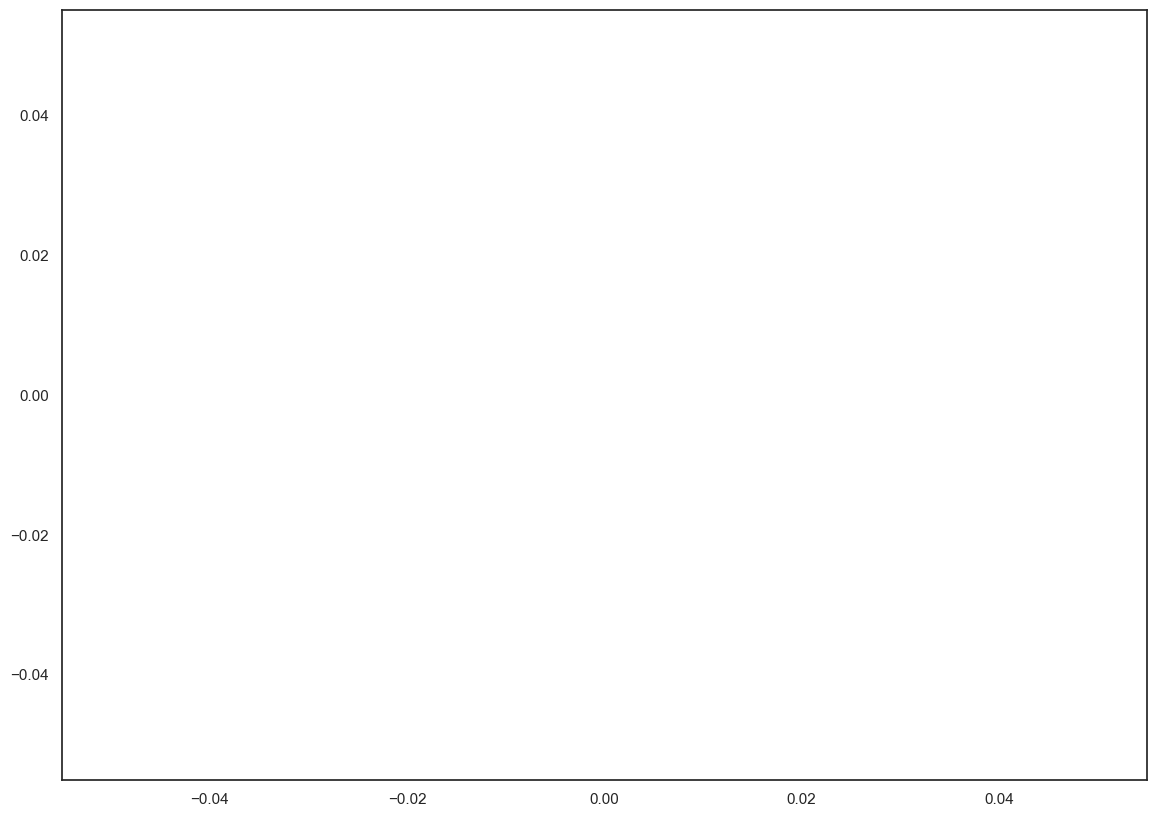

In [44]:
log_transform(df,['Weight (kg)','Height (cm)'])

#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["Weight (kg)_log"], axlabel="Weight (kg)_log");
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["Height (cm)_log"], axlabel="Height (cm)_log");

In [45]:
import umap.umap_ as umap

reducer = umap.UMAP()

animal_data = df[
    [
       'Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)'
    ]
].values
scaled_animal_data = StandardScaler().fit_transform(animal_data)

In [46]:
embedding = reducer.fit_transform(scaled_animal_data)
embedding.shape

(150, 2)

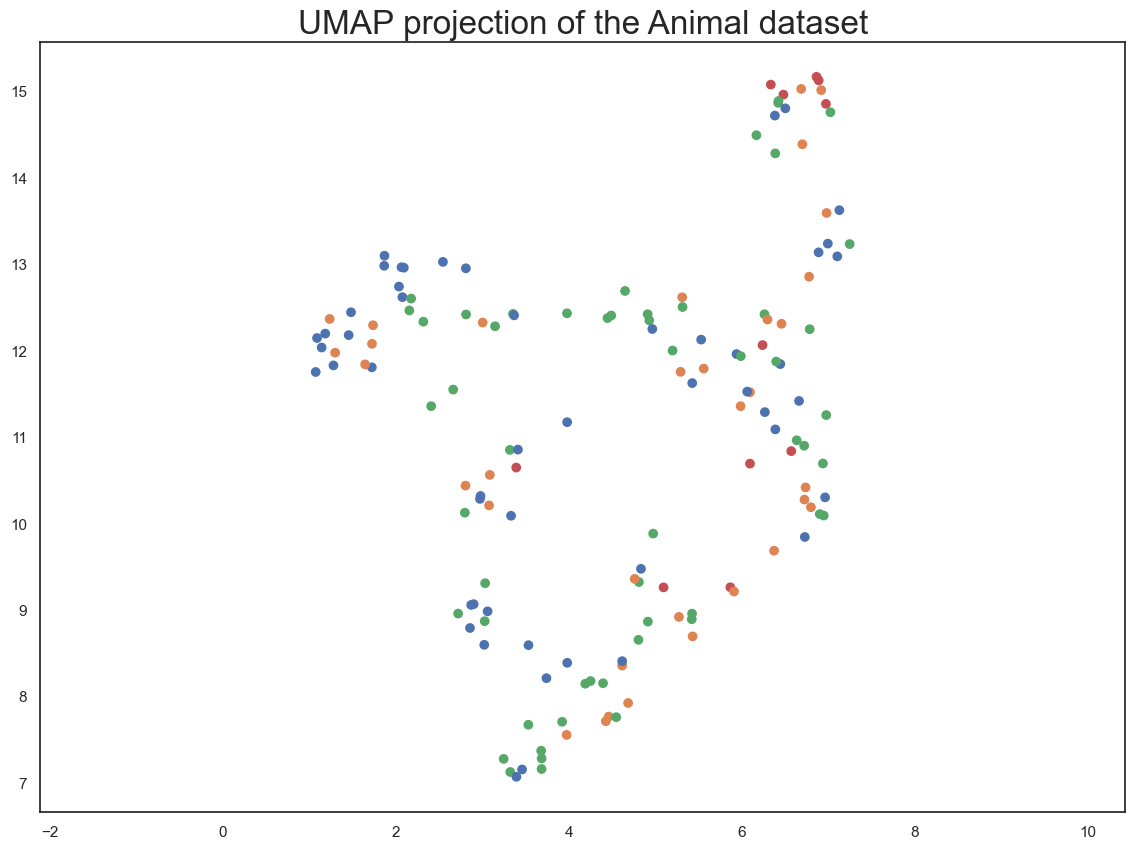

In [47]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.Diet.map({"Herbivore":0, "Omnivore":1, "Carnivore":2, "Insectivore":3})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Animal dataset', fontsize=24);

In [51]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1 = df[['Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)']].quantile(0.25)
Q3 = df[['Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)']].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_no_outliers = df[
    (df['Height (cm)'] >= lower_bound['Height (cm)']) &
    (df['Height (cm)'] <= upper_bound['Height (cm)']) &
    (df['Weight (kg)'] >= lower_bound['Weight (kg)']) &
    (df['Weight (kg)'] <= upper_bound['Weight (kg)']) &
    (df['Lifespan (years)'] >= lower_bound['Lifespan (years)']) &
    (df['Lifespan (years)'] <= upper_bound['Lifespan (years)']) &
    (df['Top Speed (km/h)'] >= lower_bound['Top Speed (km/h)']) &
    (df['Top Speed (km/h)'] <= upper_bound['Top Speed (km/h)'])
]

# Now df_no_outliers contains the DataFrame without outliers


C:\Users\buggt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


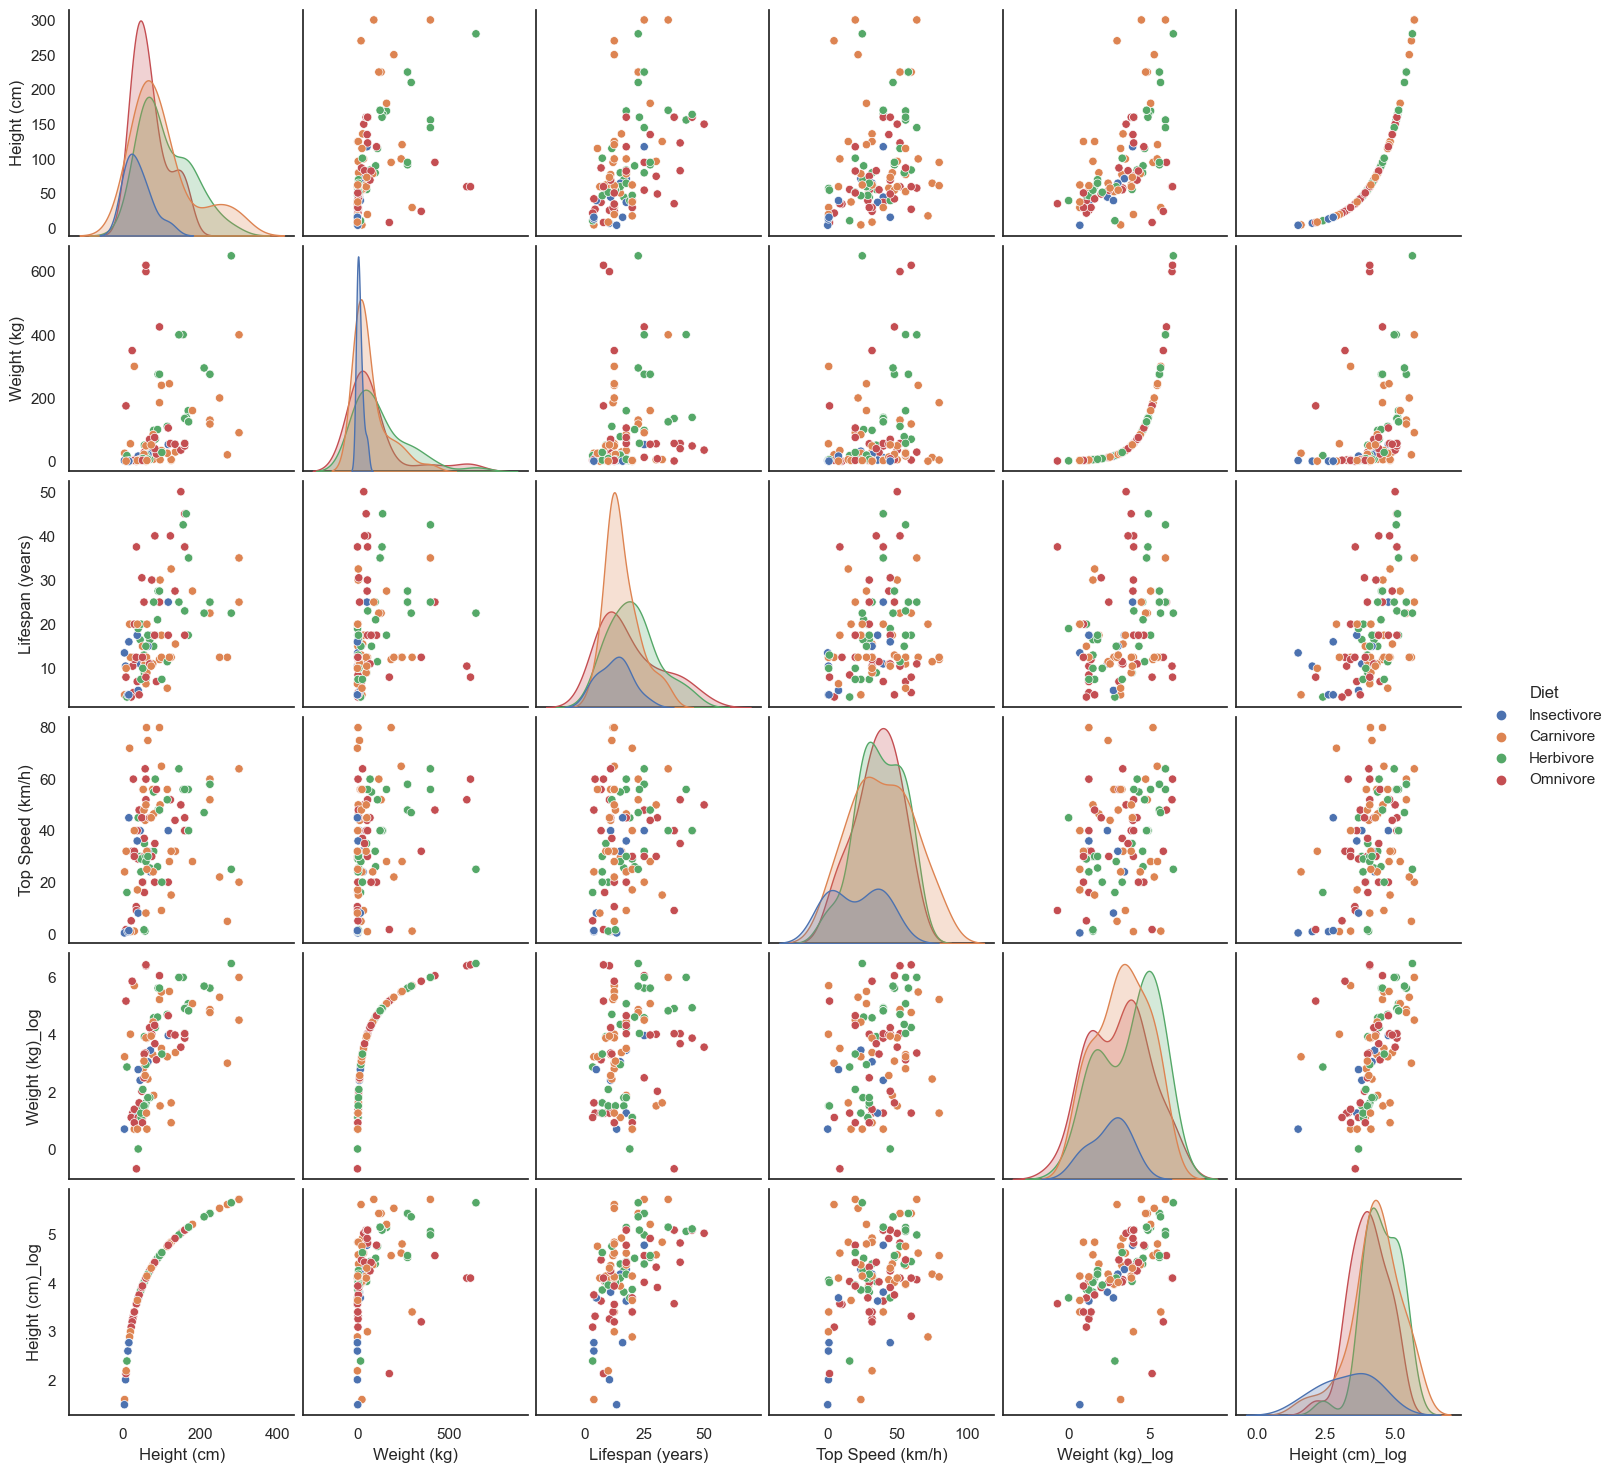

In [52]:
sns.pairplot(df_no_outliers, hue='Diet');

In [53]:
df_no_outliers.describe()

,Height (cm),Weight (kg),Lifespan (years),Top Speed (km/h),Weight (kg)_log,Height (cm)_log
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,89.004348,86.186957,17.795652,35.841739,-inf,4.185403
std,66.967015,135.022926,10.209193,19.135670,NaN,0.856634
min,4.500000,0.000000,3.500000,0.300000,-inf,1.504077
25%,45.000000,4.250000,11.000000,24.000000,1.445186,3.806662
50%,65.000000,27.500000,15.000000,35.000000,3.314186,4.174387
75%,119.000000,102.500000,22.750000,50.000000,4.629565,4.779044
max,300.000000,650.000000,50.000000,80.000000,6.476972,5.703782


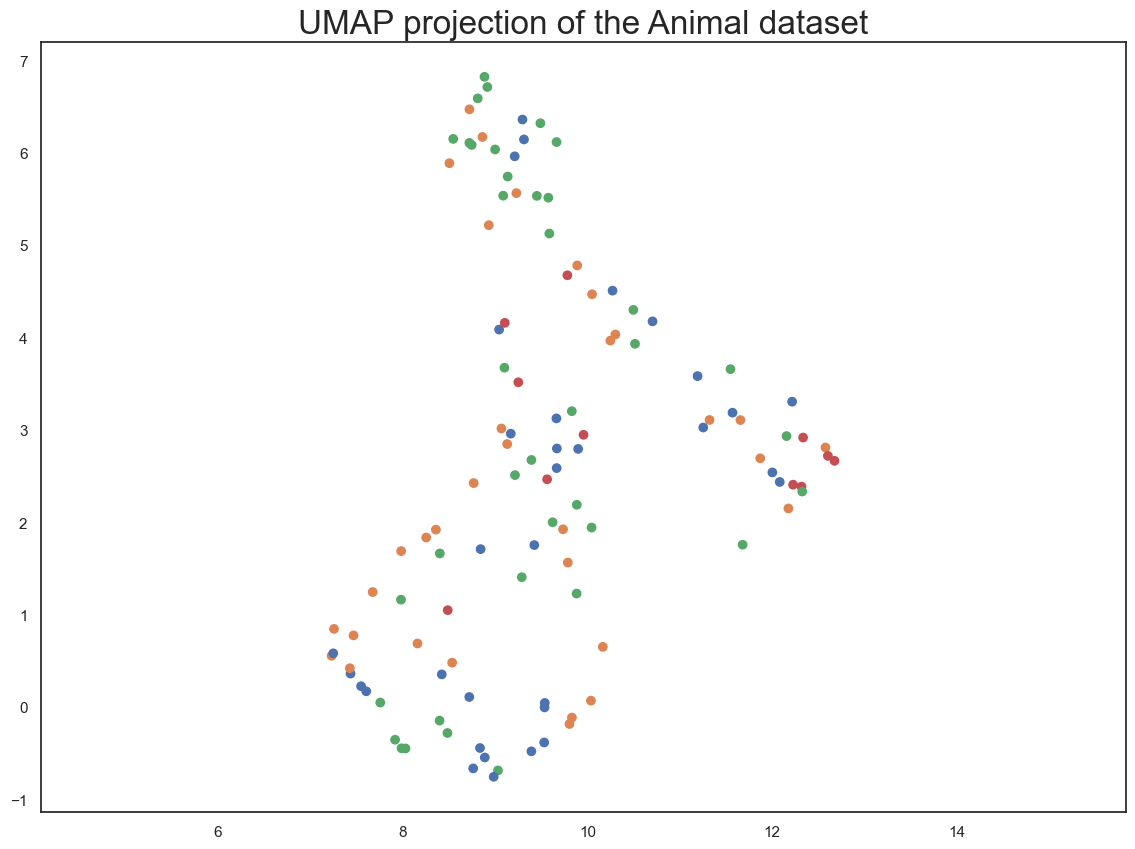

In [54]:
reducer = umap.UMAP()

animal_data1 = df_no_outliers[
    [
       'Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Top Speed (km/h)'
    ]
].values
scaled_animal_data1 = StandardScaler().fit_transform(animal_data1)

embedding = reducer.fit_transform(scaled_animal_data1)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_no_outliers.Diet.map({"Herbivore":0, "Omnivore":1, "Carnivore":2, "Insectivore":3})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Animal dataset', fontsize=24);